In [1140]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1141]:
# Charger les données
covid_data = pd.read_csv('datasetCovid.csv' , encoding="iso-8859-1")

In [1142]:
covid_data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1143]:
# Analyse de forme
# Identifier les lignes et les colonnes
print("Nombre de lignes et de colonnes :", covid_data.shape)

Nombre de lignes et de colonnes : (5644, 111)


In [1144]:
# Identifier les types des variables
print("Types des variables :\n", covid_data.dtypes)

Types des variables :
 Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object


In [1145]:
# Analyser les valeurs manquantes
print("Valeurs manquantes par colonne :\n", covid_data.isnull().sum())

Valeurs manquantes par colonne :
 Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64


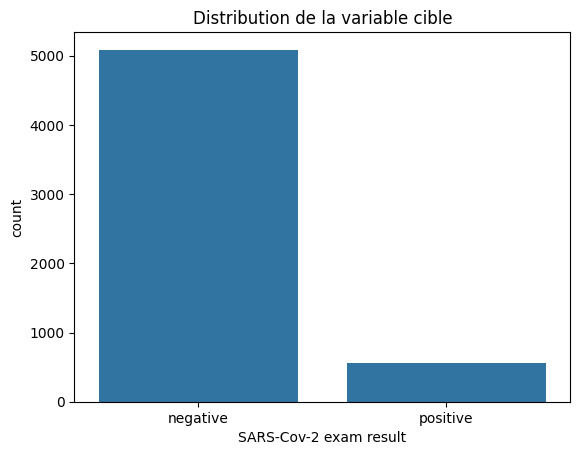

<Figure size 1000x500 with 0 Axes>

In [1146]:
# Analyse de fond
# Visualisation de la Target
sns.countplot(x='SARS-Cov-2 exam result', data=covid_data)
plt.title('Distribution de la variable cible')
plt.figure(figsize=(10, 5))
plt.show()

In [1147]:
# Signification des variables
# Vous pouvez afficher les statistiques descriptives pour mieux comprendre vos variables
print("Statistiques descriptives :\n", covid_data.describe())

Statistiques descriptives :
        Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
count           5644.000000                                     5644.000000   
mean               9.318391                                        0.013997   
std                5.777903                                        0.117489   
min                0.000000                                        0.000000   
25%                4.000000                                        0.000000   
50%                9.000000                                        0.000000   
75%               14.000000                                        0.000000   
max               19.000000                                        1.000000   

       Patient addmited to semi-intensive unit (1=yes, 0=no)  \
count                                        5644.000000       
mean                                            0.008859       
std                                             0.093713       
min

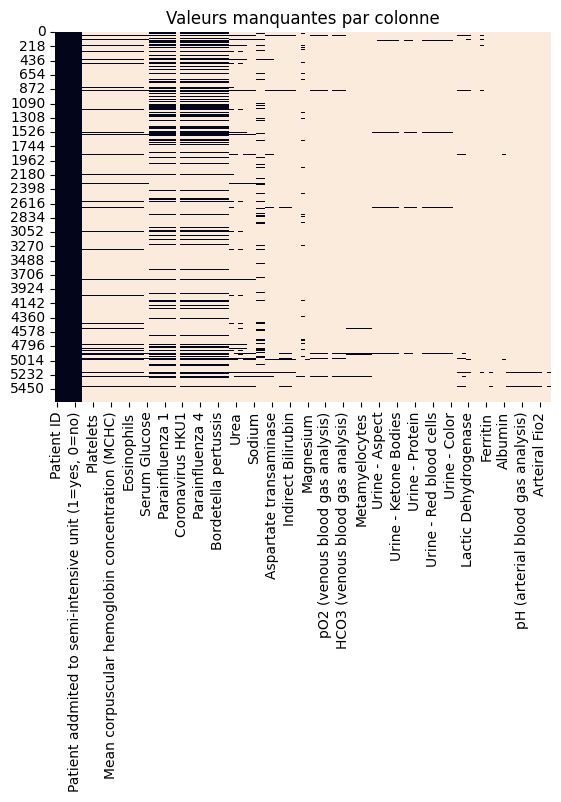

In [1148]:
ax = sns.heatmap(covid_data.isnull(), cbar=False)
ax.set_title('Valeurs manquantes par colonne')
plt.show()



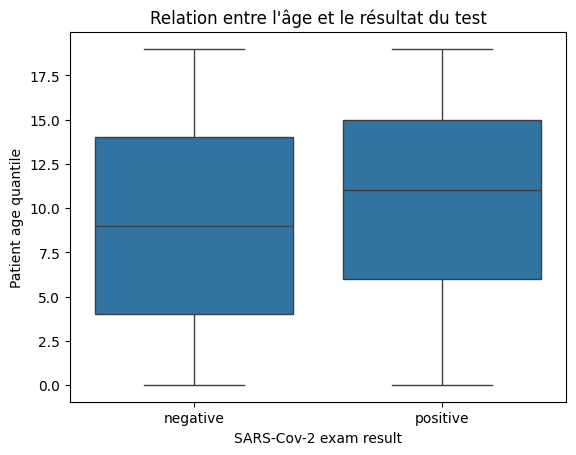

In [1149]:
# Relation variable/Target
# Vous pouvez utiliser des graphiques pour explorer la relation entre différentes variables et la variable cible
# Par exemple, vérifiez la relation entre l'âge et le résultat du test
sns.boxplot(x='SARS-Cov-2 exam result', y='Patient age quantile', data=covid_data)
plt.title('Relation entre l\'âge et le résultat du test')
plt.show()

In [1150]:
# Set your threshold (e.g., 30%)
threshold = 0.8
# Identify columns with missing values exceeding the threshold
columns_to_drop = covid_data.columns[covid_data.isnull().mean() > threshold]
# Drop the columns
covid_data = covid_data.drop(columns=columns_to_drop)
covid_data_preprocessed = covid_data.drop(columns=['Patient ID'])


In [1151]:
covid_data_preprocessed

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1152]:
covid_data_preprocessed.dtypes

Patient age quantile                                      int64
SARS-Cov-2 exam result                                   object
Patient addmited to regular ward (1=yes, 0=no)            int64
Patient addmited to semi-intensive unit (1=yes, 0=no)     int64
Patient addmited to intensive care unit (1=yes, 0=no)     int64
Respiratory Syncytial Virus                              object
Influenza A                                              object
Influenza B                                              object
Parainfluenza 1                                          object
CoronavirusNL63                                          object
Rhinovirus/Enterovirus                                   object
Coronavirus HKU1                                         object
Parainfluenza 3                                          object
Chlamydophila pneumoniae                                 object
Adenovirus                                               object
Parainfluenza 4                         

In [1153]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [1154]:
def preprocess_categorical_column(df, column_name , new_column_name):
    # Impute missing values with the most frequent category
    imputer = SimpleImputer(strategy='most_frequent')
    df[column_name] = imputer.fit_transform(df[[column_name]])
    # Encode the categories using Label Encoding
    le = LabelEncoder()
    df[new_column_name] = le.fit_transform(df[column_name])
    return df


In [1155]:
categorical_columns = [
    'SARS-Cov-2 exam result',
    'Respiratory Syncytial Virus',
    'Influenza A',
    'Influenza B',
    'Parainfluenza 1',
    'CoronavirusNL63',
    'Rhinovirus/Enterovirus',
    'Coronavirus HKU1',
    'Parainfluenza 3',
    'Chlamydophila pneumoniae',
    'Adenovirus',
    'Parainfluenza 4',
    'Coronavirus229E',
    'CoronavirusOC43',
    'Inf A H1N1 2009',
    'Bordetella pertussis',
    'Metapneumovirus',
    'Parainfluenza 2'
]
new_categorical_columns = [f"encoded_{column}" for column in categorical_columns]
for column in categorical_columns:
    covid_data_preprocessed = preprocess_categorical_column(covid_data_preprocessed, column , f"encoded_{column}")
covid_data_preprocessed = covid_data_preprocessed.drop(columns=categorical_columns)


In [1156]:
new_categorical_columns.__len__()

18

In [1157]:
covid_data_preprocessed.dtypes

Patient age quantile                                     int64
Patient addmited to regular ward (1=yes, 0=no)           int64
Patient addmited to semi-intensive unit (1=yes, 0=no)    int64
Patient addmited to intensive care unit (1=yes, 0=no)    int64
encoded_SARS-Cov-2 exam result                           int32
encoded_Respiratory Syncytial Virus                      int32
encoded_Influenza A                                      int32
encoded_Influenza B                                      int32
encoded_Parainfluenza 1                                  int32
encoded_CoronavirusNL63                                  int32
encoded_Rhinovirus/Enterovirus                           int32
encoded_Coronavirus HKU1                                 int32
encoded_Parainfluenza 3                                  int32
encoded_Chlamydophila pneumoniae                         int32
encoded_Adenovirus                                       int32
encoded_Parainfluenza 4                                

In [1158]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

In [1159]:
target_column = 'encoded_SARS-Cov-2 exam result'


In [1160]:
X = covid_data_preprocessed[[column for column in new_categorical_columns if column != target_column]]
y = covid_data_preprocessed[target_column]


In [1161]:
from sklearn.ensemble import RandomForestClassifier

In [1162]:
rf = RandomForestClassifier(n_estimators=50, random_state=1 , min_samples_split=10)

In [1163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1164]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [1165]:
preds = rf.predict(X_test)

In [1166]:
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix

In [1167]:
acc = accuracy_score(y_test, preds)

In [1168]:
acc

0.9043401240035429

In [1169]:
from sklearn.feature_selection import RFE


In [1170]:

X1 = covid_data_preprocessed.drop(columns=['encoded_SARS-Cov-2 exam result'])
y1 = covid_data_preprocessed['encoded_SARS-Cov-2 exam result']

model = RandomForestClassifier()  # You can use a different model based on your problem
rfe = RFE(model, n_features_to_select=5)  # Adjust the number of features
X_selected = rfe.fit_transform(X1, y1)
selected_features = X1.columns[rfe.support_].tolist()
selected_features

['Patient age quantile',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'encoded_Influenza B',
 'encoded_Rhinovirus/Enterovirus']

In [1171]:
rf = RandomForestClassifier(n_estimators=50, random_state=1, min_samples_split=10, max_depth=10, min_samples_leaf=4, max_features='sqrt')


In [1172]:
predictors = X1[selected_features]
target = y1


In [1173]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [1174]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, random_state=1)

In [1175]:
preds = rf.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [1176]:
acc = accuracy_score(y_test, preds)
conf_matrix = confusion_matrix(y_test, preds)
classification_rep = classification_report(y_test, preds)

print(f"Accuracy: {acc}")
print(f"Confusion matrix: \n{conf_matrix}")
print(f"Classification report: \n{classification_rep}")

Accuracy: 0.9043401240035429
Confusion matrix: 
[[1015    6]
 [ 102    6]]
Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1021
           1       0.50      0.06      0.10       108

    accuracy                           0.90      1129
   macro avg       0.70      0.52      0.52      1129
weighted avg       0.87      0.90      0.87      1129



In [1177]:
y_test.value_counts()

0    1021
1     108
Name: encoded_SARS-Cov-2 exam result, dtype: int64

In [1178]:
combined_data = pd.DataFrame({"actual": y_test, "predicted": preds})
pd.crosstab(combined_data['actual'], combined_data['predicted'])

predicted,0,1
actual,,
0,1015,6
1,102,6


In [1179]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}

# Define the RandomForestClassifier with the tuned hyperparameters
rf = RandomForestClassifier(n_estimators=50, random_state=1, min_samples_split=10, max_depth=10, min_samples_leaf=4, max_features='sqrt')

# Define the cross-validation method
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
cv_scores

array([0.90168291, 0.90079717, 0.90079717, 0.90079717, 0.90159574])

In [1180]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Create a RandomForestClassifier
# rf = RandomForestClassifier(random_state=1)

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='accuracy')

# # Fit the model to the data
# grid_search.fit(X1[selected_features], y1)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Get the best model
# best_rf = grid_search.best_estimator_

# # Evaluate the model
# cv_scores_tuned = cross_val_score(best_rf, X1[selected_features], y1, cv=cv, scoring='accuracy')
# print("Cross-Validation Scores with Tuned Hyperparameters:", cv_scores_tuned)
# print("Mean Cross-Validation Score:", np.mean(cv_scores_tuned))
